In [1]:
%matplotlib inline 
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd 


# --- read data ---- 
df = pd.read_csv('Droughts_satelite_and_events.csv')
districts_with_droughts = pd.read_csv('districts_with_droughts_Uganda_Kenya.csv')
df.head()

,Country,District,year,month,day,date,NDVI,EVI,precipitation_per_hour_v1,precipitation_per_hour_v2,...,SPEI_6month,SPEI_7month,SPEI_8month,SPEI_9month,SPEI_10month,SPEI_11month,SPEI_12month,drought_reported,drought_news_article,drought_desinventar
0,Uganda,ABIM,2000,3,1,2000-03-01,0.270712,0.137156,0.031873,5.285528,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
1,Uganda,ABIM,2000,4,1,2000-04-01,0.368438,0.184616,0.172345,84.424662,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
2,Uganda,ABIM,2000,5,1,2000-05-01,0.624764,0.365380,0.185952,100.613865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
3,Uganda,ABIM,2000,6,1,2000-06-01,0.669868,0.416891,0.205662,91.973897,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
4,Uganda,ABIM,2000,7,1,2000-07-01,0.717746,0.458402,0.157562,67.037938,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False


# Do seasons matter? 
Let's see how many of the reported events occur within Uganda's known dry seasons

## Uganda 

dry seasons: 
* from December through February
* from June through July 

wet seasons: 
* from September through November 
* from March through May 

dry seasons shown in blue
wet seasons shown in red

 

drought events reported for Uganda
# events in wet seasons:  92
# events in dry seasons:  1199
92.87374128582493 % of all reported events occur in the dry seasons (Uganda)


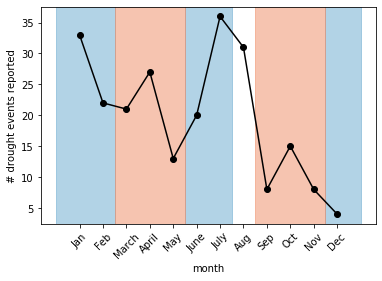

In [2]:
Uganda = df[df['Country']=='Uganda'] 
drought_events = Uganda[Uganda['drought_reported']]
month_of_event = []
for date in pd.to_datetime(drought_events['date']):
    month_of_event.append( date.month )
month_of_event = np.array(month_of_event)
    
# -- Uganda's seasons --- 
dry_season_1 = [12,2]
dry_season_2 = [6,7]
wet_season_1  = [9,11]
wet_season_2  = [3,5]


plt.axvspan(dry_season_1[0]-0.5, 13, ymax=40, color='#67a9cf', alpha=0.5)
plt.axvspan(0,dry_season_1[1]+0.5, ymax=40, color='#67a9cf', alpha=0.5)

plt.axvspan(dry_season_2[0]-0.5, dry_season_2[1]+0.5, ymax=40, color='#67a9cf', alpha=0.5)

plt.axvspan(wet_season_1[0]-0.5, wet_season_1[1]+0.5, ymax=40, color='#ef8a62', alpha=0.5)
plt.axvspan(wet_season_2[0]-0.5, wet_season_2[1]+0.5, ymax=40, color='#ef8a62', alpha=0.5)


# plt.hist(month_of_event, bins=[i-0.5 for i in range(14)], color='black',histtype='step');
counts, bins = np.histogram(month_of_event,bins=[i-0.5 for i in range(1,14)])
plt.plot(range(1,13), counts, marker='o',color='black')
plt.xlabel('month');
plt.xticks(range(1,13), ['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec'],rotation=45)
plt.ylabel('# drought events reported');
print('dry seasons shown in blue')
print('wet seasons shown in red')
print('\n \n')





# --- fraction of events within the dry seasons ---- 
events_in_wet_seasons = np.sum( (month_of_event <= wet_season_1[1])&(month_of_event >= wet_season_1[0])  )
events_in_wet_seasons += np.sum( (month_of_event <= wet_season_2[1])&(month_of_event >= wet_season_2[0])  )

events_in_dry_seasons = np.sum(month_of_event) - events_in_wet_seasons
print('drought events reported for Uganda')
print('# events in wet seasons: ', events_in_wet_seasons)
print('# events in dry seasons: ', events_in_dry_seasons)
print((events_in_dry_seasons/(events_in_dry_seasons+events_in_wet_seasons))*100, '% of all reported events occur in the dry seasons (Uganda)')


## Kenya

dry seasons: 
* from June through October
* from December through March 

wet seasons: 
* end of October until December (essentially November) 
* from April through May  

dry seasons shown in blue
wet seasons shown in red

 

drought events reported for Kenya
# events in wet seasons:  28
# events in dry seasons:  545
95.11343804537522 % of all reported events occur in the dry seasons (Uganda)


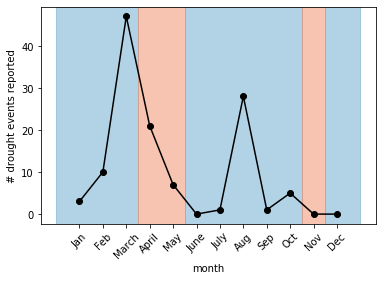

In [3]:
Kenya = df[df['Country']=='Kenya'] 
drought_events = Kenya[Kenya['drought_reported']]
month_of_event = []
for date in pd.to_datetime(drought_events['date']):
    month_of_event.append( date.month )
month_of_event = np.array(month_of_event)
    
# -- Kenya's seasons --- 
dry_season_1 = [12,3]
dry_season_2 = [6,10]
wet_season_1  = [11,11]
wet_season_2  = [4,5]

plt.axvspan(dry_season_1[0]-0.5, 13, ymax=40, color='#67a9cf', alpha=0.5)
plt.axvspan(0,dry_season_1[1]+0.5, ymax=40, color='#67a9cf', alpha=0.5)
plt.axvspan(dry_season_2[0]-0.5, dry_season_2[1]+0.5, ymax=40, color='#67a9cf', alpha=0.5)
plt.axvspan(wet_season_1[0]-0.5, wet_season_1[1]+0.5, ymax=40, color='#ef8a62', alpha=0.5)
plt.axvspan(wet_season_2[0]-0.5, wet_season_2[1]+0.5, ymax=40, color='#ef8a62', alpha=0.5)


# plt.hist(month_of_event, bins=[i-0.5 for i in range(14)], color='black',histtype='step');
counts, bins = np.histogram(month_of_event,bins=[i-0.5 for i in range(1,14)])
plt.plot(range(1,13), counts, marker='o',color='black')
plt.xlabel('month');
plt.xticks(range(1,13), ['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec'],rotation=45)
plt.ylabel('# drought events reported');
print('dry seasons shown in blue')
print('wet seasons shown in red')
print('\n \n')






# --- fraction of events within the dry seasons ---- 
events_in_wet_seasons = np.sum( (month_of_event <= wet_season_1[1])&(month_of_event >= wet_season_1[0])  )
events_in_wet_seasons += np.sum( (month_of_event <= wet_season_2[1])&(month_of_event >= wet_season_2[0])  )

events_in_dry_seasons = np.sum(month_of_event) - events_in_wet_seasons
print('drought events reported for Kenya')
print('# events in wet seasons: ', events_in_wet_seasons)
print('# events in dry seasons: ', events_in_dry_seasons)
print((events_in_dry_seasons/(events_in_dry_seasons+events_in_wet_seasons))*100, '% of all reported events occur in the dry seasons (Uganda)')


In conclusion: It certainly makes sense to not normalize based on the time of year, as the seasonal trends seem to actually hold predictive value 

# Use Z-norm to compare different districts and types of data  

In [19]:
from sklearn.preprocessing import StandardScaler
Znorm = StandardScaler()

features = list( df.columns.drop(['drought_reported','drought_news_article','drought_desinventar',
                                'date','day','month','year','District','Country',
                                  'SPEI_1month',
                                 'SPEI_2month',
                                 'SPEI_3month',
                                 'SPEI_4month',
                                 'SPEI_5month',
                                 'SPEI_6month',
                                 'SPEI_7month',
                                 'SPEI_8month',
                                 'SPEI_9month',
                                 'SPEI_10month',
                                 'SPEI_11month',
                                 'SPEI_12month']) )


for district in df['District'].unique():
    # -- filter by district --
    group = df[df['District']==district]
    
    satelite_data = group[features].dropna()
# satelite_data.head()
    Znorm.fit(satelite_data )
    
#     normed_satelite_data = pd.DataFrame(Znorm.transform(satelite_data),  columns=features)
    
    
    
    


In [18]:
print(satelite_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 12395 to 12628
Data columns (total 19 columns):
NDVI                             234 non-null float64
EVI                              234 non-null float64
precipitation_per_hour_v1        234 non-null float64
precipitation_per_hour_v2        234 non-null float64
surface_temperature_daytime      234 non-null float64
surface_temperature_nighttime    234 non-null float64
evapotranspiration               234 non-null float64
rainfall                         234 non-null float64
SoilMoisture00_10cm              234 non-null float64
SoilMoisture10_40cm              234 non-null float64
SoilMoisture40_100cm             234 non-null float64
SoilMoisture100_200cm            234 non-null float64
SoilTemperature00_10cm           234 non-null float64
SoilTemperature10_40cm           234 non-null float64
SoilTemperature40_100cm          234 non-null float64
SoilTemperature100_200cm         234 non-null float64
air_temperature          

In [15]:
np.sum( satelite_data.values == np.inf ) 

0

In [13]:
Uganda[Uganda.drought_reported][Uganda.District=='ABIM']

/Users/mklein1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Country,District,year,month,day,date,NDVI,EVI,precipitation_per_hour_v1,precipitation_per_hour_v2,...,SPEI_6month,SPEI_7month,SPEI_8month,SPEI_9month,SPEI_10month,SPEI_11month,SPEI_12month,drought_reported,drought_news_article,drought_desinventar
22,Uganda,ABIM,2002,1,1,2002-01-01,0.350700,0.151954,0.014317,6.142172,...,0.179889,0.775433,1.032637,0.897653,0.697753,0.909872,0.804192,True,True,False
41,Uganda,ABIM,2003,8,1,2003-08-01,0.714736,0.459955,0.200323,107.606609,...,0.796114,0.786066,0.822198,0.957503,0.920019,0.911716,0.925954,True,False,True
106,Uganda,ABIM,2009,1,1,2009-01-01,0.310700,0.132644,0.032534,24.326223,...,-0.341339,0.431158,0.339579,-0.005420,-0.971652,-0.881425,-0.892755,True,False,True
111,Uganda,ABIM,2009,6,1,2009-06-01,0.644736,0.387095,0.104592,12.570147,...,-0.953254,-0.873653,-0.663645,-0.745203,-0.843131,-0.983246,-0.320964,True,False,True
133,Uganda,ABIM,2011,4,1,2011-04-01,0.549488,0.303241,0.044594,58.062510,...,-0.398794,-0.532395,-0.471276,-0.720888,-0.527646,-0.867490,-0.743365,True,False,True
137,Uganda,ABIM,2011,8,1,2011-08-01,0.708918,0.441946,0.221184,97.288661,...,0.617007,0.584919,0.510113,0.591574,0.379529,0.305222,0.329286,True,True,False
143,Uganda,ABIM,2012,2,1,2012-02-01,0.301021,0.133163,0.003120,3.359757,...,0.547264,1.066867,1.107546,1.462014,1.149801,0.425929,1.052065,True,True,False
160,Uganda,ABIM,2013,7,1,2013-07-01,0.667149,0.370396,0.272436,114.773169,...,-0.624819,-0.846440,-0.882654,-0.549083,-0.419976,-0.444513,-0.304854,True,True,False
203,Uganda,ABIM,2017,2,1,2017-02-01,0.303016,0.150204,0.060427,25.532248,...,0.315663,-0.820556,-1.207903,-1.444104,-1.749183,-0.653685,-0.944099,True,True,False
227,Uganda,ABIM,2019,2,1,2019-02-01,0.324562,0.159786,0.013876,4.260187,...,-2.032773,-2.109419,-1.928753,-1.618685,-0.330393,0.994406,1.361681,True,True,False


In [6]:
for x in df.columns:
    print(x)

Country
District
year
month
day
date
NDVI
EVI
precipitation_per_hour_v1
precipitation_per_hour_v2
surface_temperature_daytime
surface_temperature_nighttime
evapotranspiration
rainfall
SoilMoisture00_10cm
SoilMoisture10_40cm
SoilMoisture40_100cm
SoilMoisture100_200cm
SoilTemperature00_10cm
SoilTemperature10_40cm
SoilTemperature40_100cm
SoilTemperature100_200cm
air_temperature
wind_speed
SPEI_1month
SPEI_2month
SPEI_3month
SPEI_4month
SPEI_5month
SPEI_6month
SPEI_7month
SPEI_8month
SPEI_9month
SPEI_10month
SPEI_11month
SPEI_12month
drought_reported
drought_news_article
drought_desinventar
